In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
mode = ["X", "Preserving"][0]
basis = 12
if mode == "Preserving":
    mode += str(basis)
layer = 5
Asset = 7
qubits_per_asset = 2

L = 0
q = 0

L = 0.0001
q = 0

L = 0
q = 0.3

L = -0.00006
q = 0

# L = 0
# q = -0.5

# L = 0.0005
# q = 1.5

L = 0.00005
q = 0.15


boost = 1 if mode == "X" else 2000

n_qubit = Asset * qubits_per_asset


arr = np.load(f"./state_return_{mode}_boost_{boost}_p{layer}_L{L}_q{q}_A{Asset}_Q{n_qubit}.npy")
print(arr.shape)

mi, ma = np.min(arr), np.max(arr)
# arr = (arr - mi) / (ma - mi)
print("mean arr: ", np.mean(arr))

print("Approx ratio mean: ", (np.mean(arr) - mi) / (ma - mi))

(16384,)
mean arr:  0.002645627025978565
Approx ratio mean:  0.6549379402233293


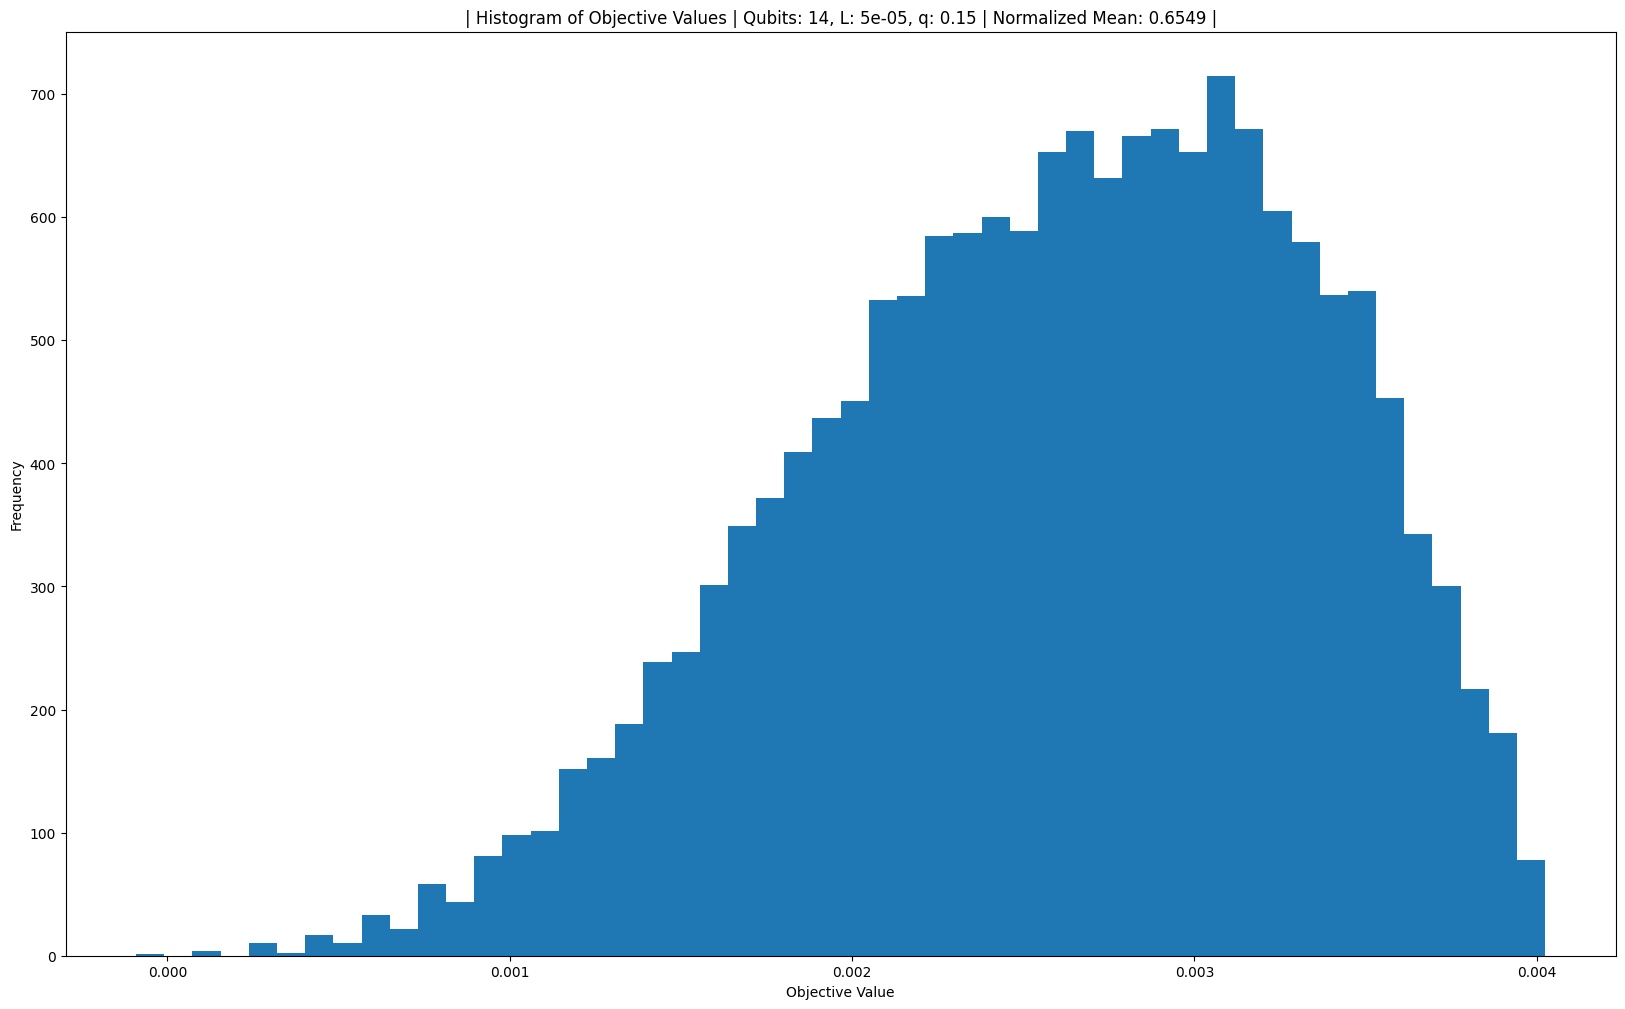

In [18]:
hist, binn = np.histogram(arr, bins=50)
plt.figure(figsize=(20, 12))
plt.bar(binn[:-1], hist, width=binn[1]-binn[0])
plt.title(f"| Histogram of Objective Values | Qubits: {n_qubit}, L: {L}, q: {q} | Normalized Mean: {(np.mean(arr) - mi) / (ma - mi):.4f} |")
plt.xlabel("Objective Value")
plt.ylabel("Frequency")
plt.show()

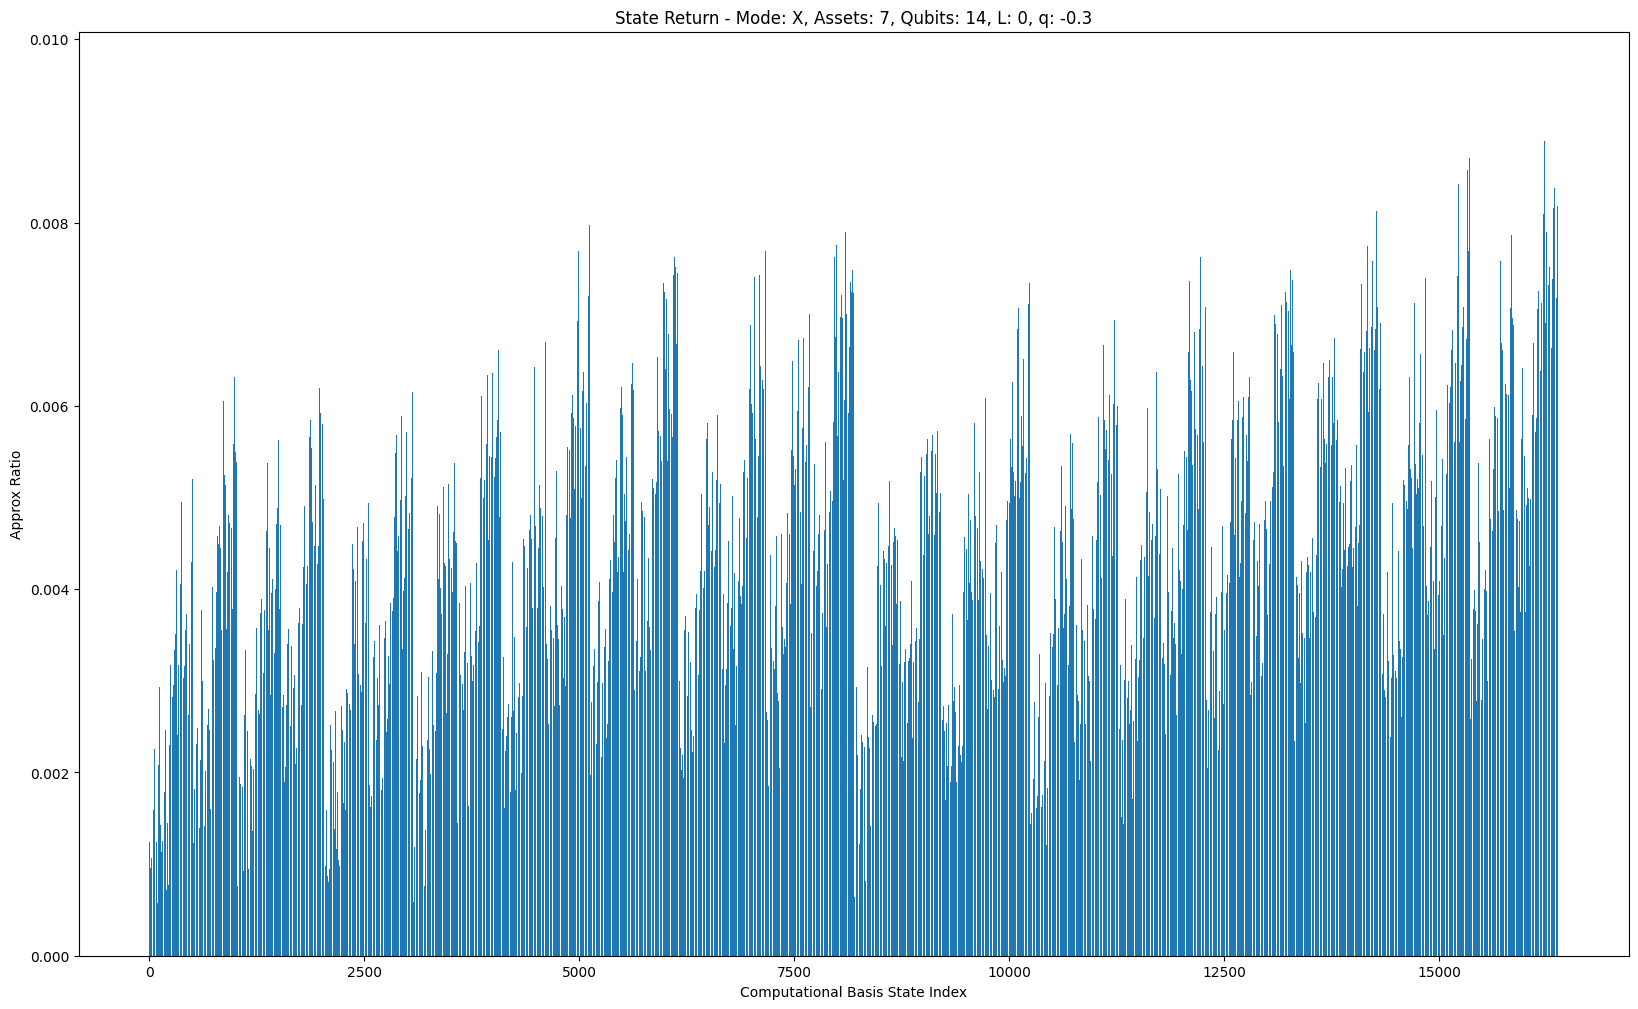

In [31]:
plt.figure(figsize=(20, 12))
plt.bar(range(len(arr)), arr)
plt.title(f"State Return - Mode: {mode}, Assets: {Asset}, Qubits: {n_qubit}, L: {L}, q: {q}")
plt.xlabel("Computational Basis State Index")
plt.ylabel("Approx Ratio")
plt.show()